In [1]:
import importlib
import sys
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
import numpy as np
if 'MyUtilityFunctions' in sys.modules:
    importlib.reload(sys.modules['MyUtilityFunctions'])
import MyUtilityFunctions as myutils
myutil = myutils.MyUtilityFunctions()

Utility class created


In [ ]:
# dataset description
dataFrame = pd.read_excel('lung_cancer.xlsx')
print(dataFrame.describe())
# extract describe data to a csv file
dataFrame.describe().T.to_csv('lung_cancer_describe_transpose.csv')


In [4]:
keys = ['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring', 'Level'
        ]
dataset = myutil.read_dataset('lung_cancer.xlsx', keys)
dataset['Level'] = dataset['Level'].map({'Low': 0, 'Medium': 1, 'High': 2})
len(dataset)
# filter_dataset = myutil.clean_dataset(dataset)

In [ ]:
color_dict = {0: 'green', 1: 'blue', 2: 'red'}
save_location = 'result/dataset_analysis/feature_distribution_histogram_x_valuerange_y_frequency.png'
myutil.dataset_analysis(color_dict, dataset, keys, save_location)

save_location='result/dataset_analysis/correlation_matrix.png'
myutil.draw_correration_matrix(dataset, 'result/dataset_analysis/correlation_matrix.png')

save_location='result/dataset_analysis/feature_distance.png'
myutil.feature_distance(dataset,'Lung Cancer', save_location)

In [5]:
features = ['Age', 'Gender', 'Air Pollution', 'Alcohol use',
       'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk',
       'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking',
       'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue',
       'Weight Loss', 'Shortness of Breath', 'Wheezing',
       'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold',
       'Dry Cough', 'Snoring'
        ]
target = 'Level'
X_train, X_test, y_train, y_test = myutil.prepare_training_data(dataset,features,target)

y_train_count
Level
2        246
1        235
0        219
dtype: int64
y_test_count
Level
2        119
1         97
0         84
dtype: int64


In [7]:
X = dataset[features] # Features
y = dataset[target]   # Target variable
# Create a random forest model
model = RandomForestClassifier(n_estimators=20)  # Adjust parameters as needed

# Train the model
model.fit(X_train, y_train)

# Get feature importances (MDI)
feature_importances = model.feature_importances_

# Print feature importances (sorted by importance)
sorted_indices = np.argsort(feature_importances)[::-1]
print("The feature importance shows as below: \n")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, X.columns[sorted_indices[f]], feature_importances[sorted_indices[f]]))

# # drop column 2 to remove the noise
# X = train_without_missing.drop(2, axis = 1) # Features

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The feature importance shows as below: 

1. Coughing of Blood (0.156529)
2. Passive Smoker (0.096709)
3. Fatigue (0.083746)
4. Wheezing (0.080020)
5. Obesity (0.056217)
6. Dust Allergy (0.048763)
7. Genetic Risk (0.046158)
8. Clubbing of Finger Nails (0.045460)
9. Balanced Diet (0.044565)
10. Shortness of Breath (0.041496)
11. Weight Loss (0.038200)
12. Alcohol use (0.033912)
13. Snoring (0.033604)
14. Swallowing Difficulty (0.031164)
15. OccuPational Hazards (0.030974)
16. Air Pollution (0.029492)
17. Frequent Cold (0.028816)
18. Dry Cough (0.025015)
19. Smoking (0.023425)
20. Chest Pain (0.012452)
21. chronic Lung Disease (0.009606)
22. Age (0.003677)
23. Gender (0.000000)


[0.93333333 0.95       0.96666667 0.95       0.96666667]
SVM Cross Validation Accuracy: 0.95 (+/- 0.02)
SVM accuracy: 0.9633333333333334
[0.93333333 0.95       0.91666667 0.85       0.93333333]
KNN Cross Validation Accuracy: 0.92 (+/- 0.07)
KNN accuracy: 0.9966666666666667
[0.96666667 1.         1.         0.98333333 1.        ]
Tree Cross Validation Accuracy: 0.99 (+/- 0.03)
Tree accuracy: 1.0
[1.         1.         1.         0.98333333 1.        ]
RF Cross Validation Accuracy: 1.00 (+/- 0.01)
RF accuracy: 1.0
SVM


d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarnin

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        84
           1       0.92      0.97      0.94        97
           2       0.98      1.00      0.99       119

    accuracy                           0.96       300
   macro avg       0.97      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300

KNN
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        84
           1       0.99      1.00      0.99        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Tree


d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitte

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



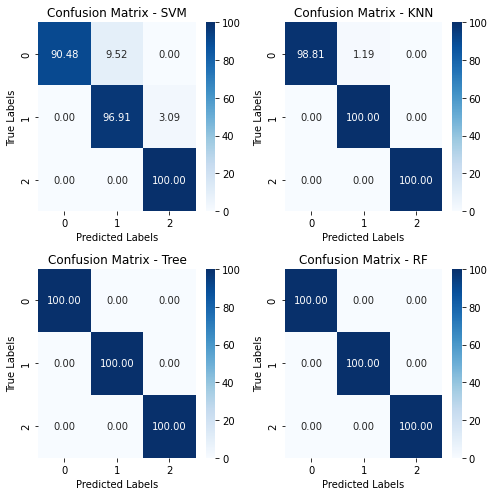

In [10]:
start = time.time()
save_location = ''; 'result/model_output/confusion_matrix_raw.png'
clf_svm, clf_knn, clf_tree, clf_rf = myutil.train_ml_model(X_train, X_test,y_train, y_test, save_location)
end = time.time()

In [12]:
# temp_dataset = dataset.copy() # Features
# temp_dataset.drop('Age', axis=1, inplace=True)
# temp_dataset.drop('Gender', axis=1, inplace=True)
temp_features = features.copy()
temp_features.remove('Age')
temp_features.remove('Gender')
X_train, X_test, y_train, y_test = myutil.prepare_training_data(dataset,temp_features,target)
# save_location = 'result/model_output/confusion_matrix_removed_class_age_gender.png'
# myutil.train_ml_model(X_train, X_test,y_train, y_test, save_location)

y_train_count
Level
2        246
1        235
0        219
dtype: int64
y_test_count
Level
2        119
1         97
0         84
dtype: int64


In [13]:
param_grid_rf = {
    'n_estimators': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced', 'balanced_subsample', None],
}

svm_param_grid = {
    'C': [0.1, 1, 10],
    # 'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'poly', 'sigmoid', 'linear'],
    'class_weight': ['balanced', None],
    'decision_function_shape': ['ovo', 'ovr']
}

knn_param_gird = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],
    'p': [1, 2]
}

df_param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

best_params_rf, best_params_svm, best_params_knn, best_params_dt = myutil.parameter_tuning(X_train, y_train, param_grid_rf,svm_param_grid, knn_param_gird, df_param_grid)

d:\Python\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 10}
{'C': 0.1, 'class_weight': 'balanced', 'decision_function_shape': 'ovo', 'kernel': 'poly'}
{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
{'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}


d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(


[1.         1.         1.         0.98333333 1.        ]
SVM Cross Validation Accuracy: 1.00 (+/- 0.01)
SVM accuracy: 1.0
[1.         1.         0.98333333 1.         0.98333333]
KNN Cross Validation Accuracy: 0.99 (+/- 0.02)
KNN accuracy: 1.0
[1.         1.         1.         0.96666667 1.        ]
Tree Cross Validation Accuracy: 0.99 (+/- 0.03)
Tree accuracy: 1.0
[1.         1.         1.         0.98333333 1.        ]
RF Cross Validation Accuracy: 1.00 (+/- 0.01)
RF accuracy: 1.0


d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarn

SVM
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

KNN
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Tree


d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with fea

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

RF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        97
           2       1.00      1.00      1.00       119

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


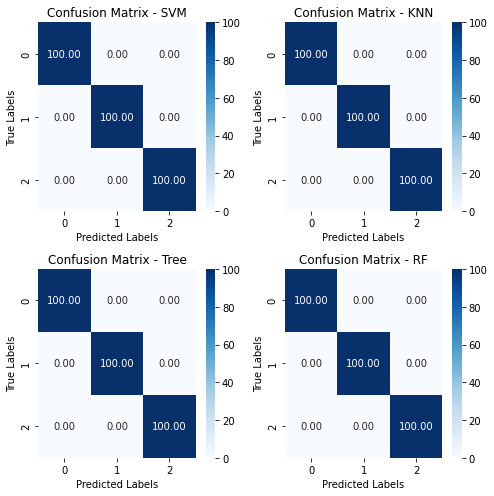

Time taken to train the model:  0.9102346897125244


In [14]:
# save_location = 'result/model_output/confusion_matrix_remove_age_gender_and_best_parameters.png'
save_location = ''
start = time.time()
clf_svm, clf_knn, clf_tree, clf_rf = myutil.train_ml_model(X_train, X_test,y_train, y_test, save_location, best_params_svm, best_params_knn, best_params_dt, best_params_rf)
end = time.time()
print('Time taken to train the model: ', end-start)

In [83]:
from sklearn.metrics import roc_curve, auc
from sklearn import svm, tree, neighbors
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.model_selection import learning_curve
# hide all warning
import warnings
warnings.filterwarnings("ignore")

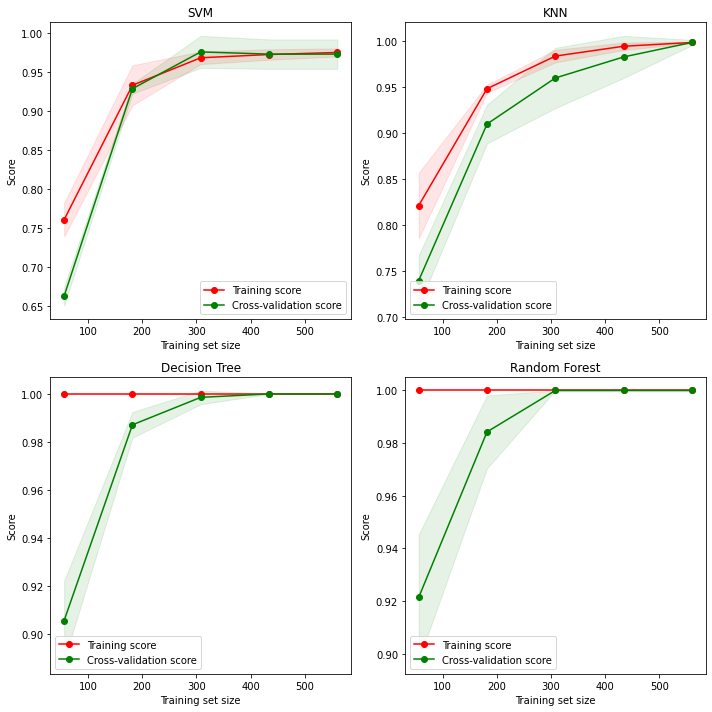

In [101]:

def plot_learning_curve(estimator, X, y, ax, name, cv=None,  train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='accuracy')
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # plt.figure(figsize=(10, 6))
    # plt.figure
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    
    ax.set_xlabel("Training set size")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.set_title(name)
    return ax
    # plt.show()
    #     ax.plot([0, 1], [0, 1], 'k--', lw=lw)
    # ax.set_xlim([0.0, 1.0])
    # ax.set_ylim([0.0, 1.05])
    # ax.set_xlabel('False Positive Rate')
    # ax.set_ylabel('True Positive Rate')
    # ax.set_title('ROC Curve')
    # ax.legend()
    
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
k = 0
j = 0
for clf, name in [(clf_svm, 'SVM'), (clf_knn, 'KNN'), (clf_tree, 'Decision Tree'), (clf_rf, 'Random Forest')]:
    plot_learning_curve(clf, X_train, y_train, axes[k][j], name, cv=5)
    j += 1
    if j == 2:
        k += 1
        j = 0

plt.tight_layout()
plt.savefig('result/model_output/learning_curve_raw.png', dpi=600)

In [48]:
# import cross_val_score 
from sklearn.model_selection import cross_val_score

In [78]:
# use k-fold cross validation
# clf_svm, clf_knn, clf_tree, clf_rf
scores = cross_val_score(clf_svm, X_test, y_test, cv=5)
print(scores)
scores = cross_val_score(clf_knn, X_test, y_test, cv=5)
print(scores)
scores = cross_val_score(clf_tree, X_test, y_test, cv=5)
print(scores)
scores = cross_val_score(clf_rf, X_test, y_test, cv=5)
print(scores)

[1.         1.         1.         0.96666667 1.        ]
[0.98333333 0.98333333 0.96666667 0.96666667 0.95      ]
[1.         1.         1.         0.98333333 1.        ]
[1.         1.         1.         0.96666667 1.        ]


d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
d:\Python\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarn

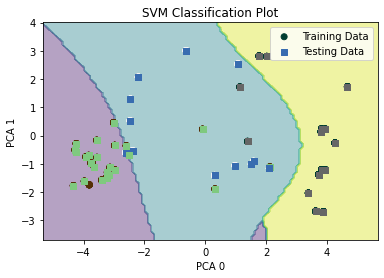

In [20]:
save_location = 'result/model_output/svm_classification_plot_remove_age_gender_and_best_parameters.png'

svm_model_pca = myutil.svm_classification_plot(X_train, X_test,y_train, y_test, best_params_svm, save_location)


In [14]:
print('SVM Decision Boundary Parameters')
# print(svm_model_pca.support_vectors_)
# print(svm_model.coef_)
print(svm_model_pca.intercept_)
print(svm_model_pca.n_support_)
# print(svm_model_pca.support_)
# print(svm_model_pca.dual_coef_)
# print(svm_model_pca.probA_)
# print(svm_model_pca.probB_)

# plot svm 

SVM Decision Boundary Parameters
[-0.93753089  0.429632    1.21559494]
[ 98 176  76]
[]
[]


In [114]:
save_location = 'result/model_output/knn_lime_explain_instance_class_15.html'
index = 15
myutil.lime_explain(temp_features, X_train,X_test, clf_knn, index, save_location)

['Air Pollution', 'Alcohol use', 'Dust Allergy', 'OccuPational Hazards', 'Genetic Risk', 'chronic Lung Disease', 'Balanced Diet', 'Obesity', 'Smoking', 'Passive Smoker', 'Chest Pain', 'Coughing of Blood', 'Fatigue', 'Weight Loss', 'Shortness of Breath', 'Wheezing', 'Swallowing Difficulty', 'Clubbing of Finger Nails', 'Frequent Cold', 'Dry Cough', 'Snoring']
['AP', 'AU', 'DA', 'OH', 'GR', 'CLD', 'BD', 'O', 'SM', 'PS', 'CP', 'COB', 'F', 'WL', 'SOB', 'W', 'SD', 'COFN', 'FC', 'DC', 'SN']


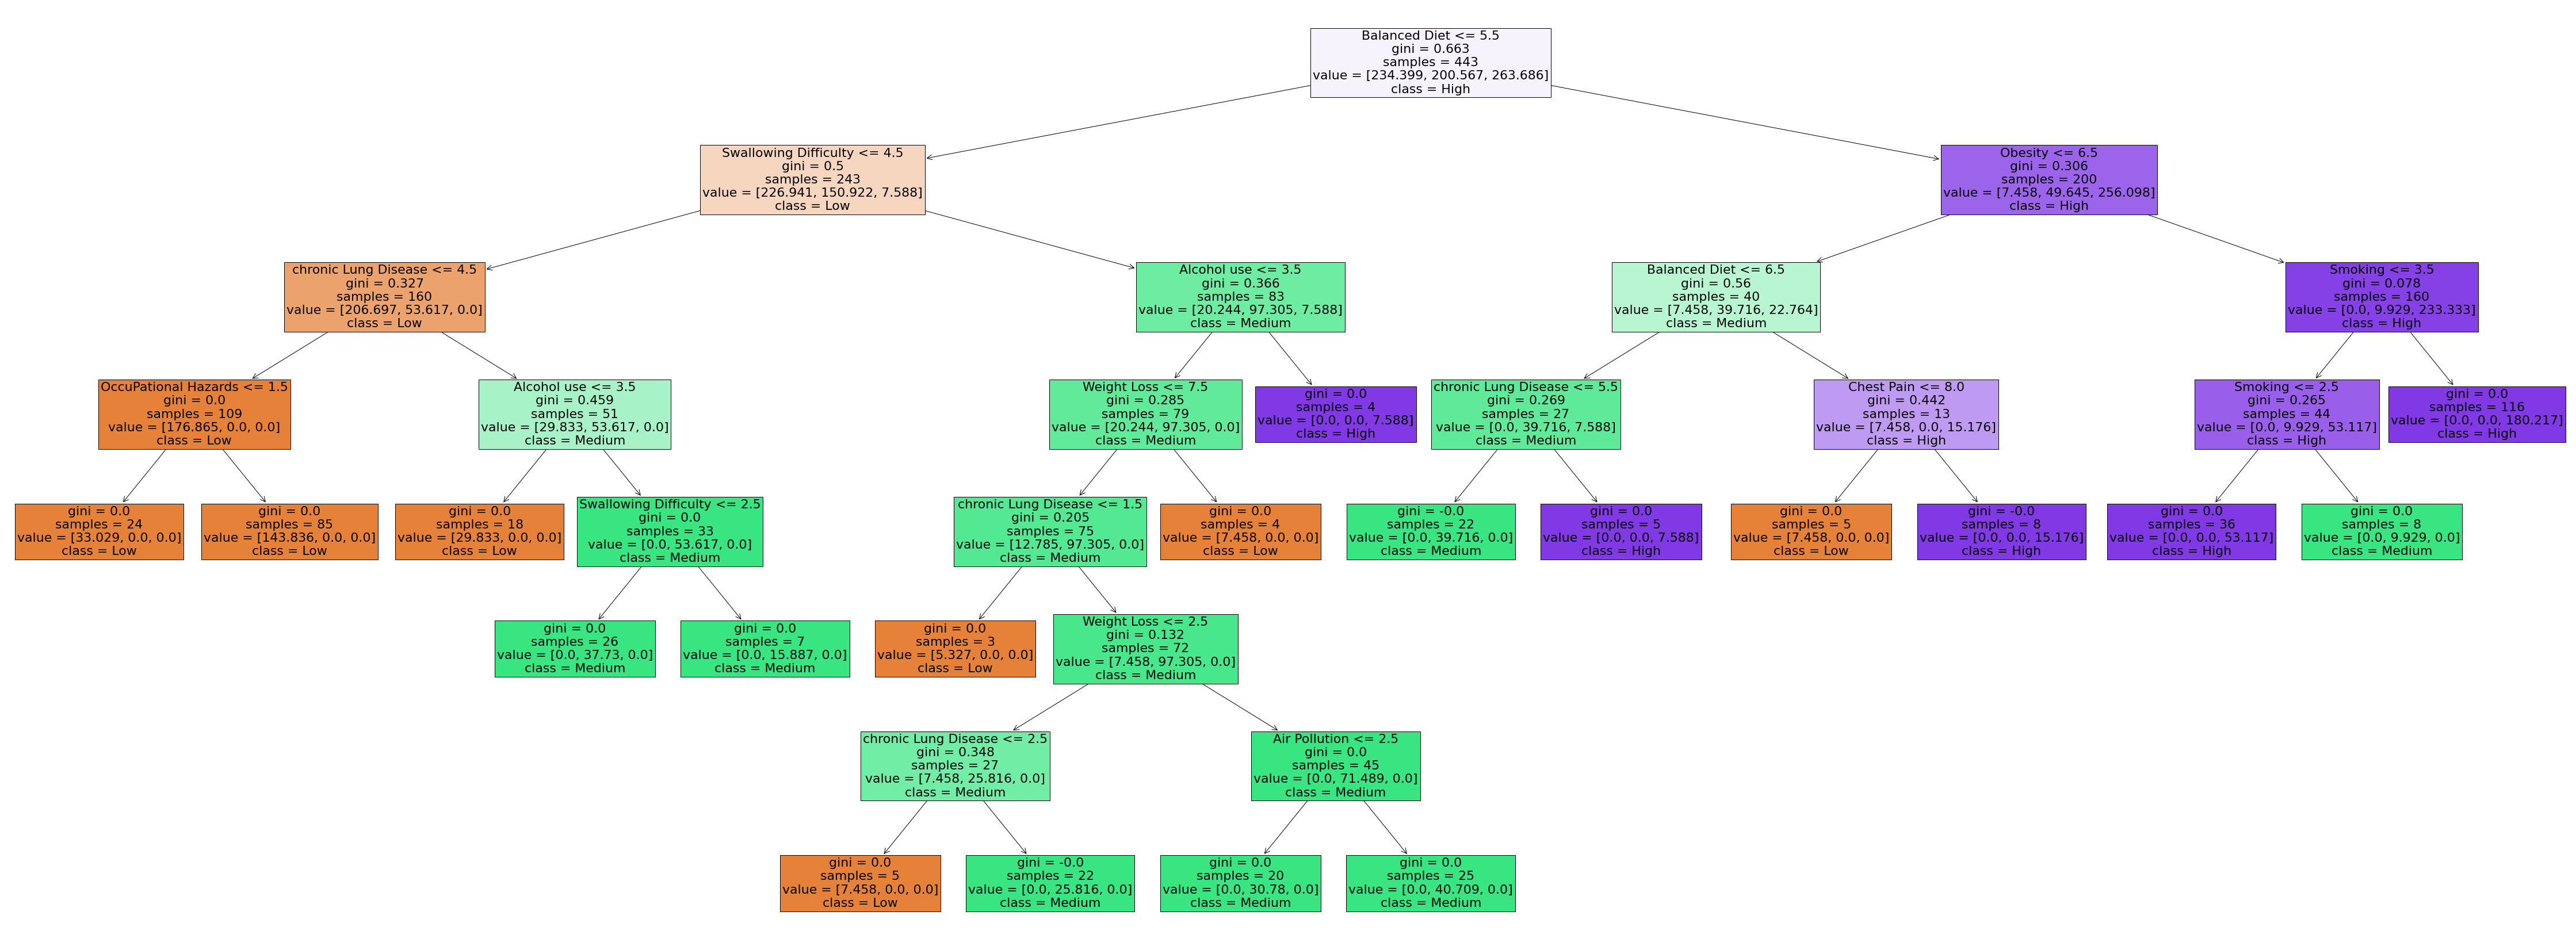

In [40]:

save_location = 'result/model_output/random_forest_decision_tree.png'
myutil.plot_decision_tree(clf_rf.estimators_[0], temp_features, save_location, fontsize=22, dimension = (80, 30))


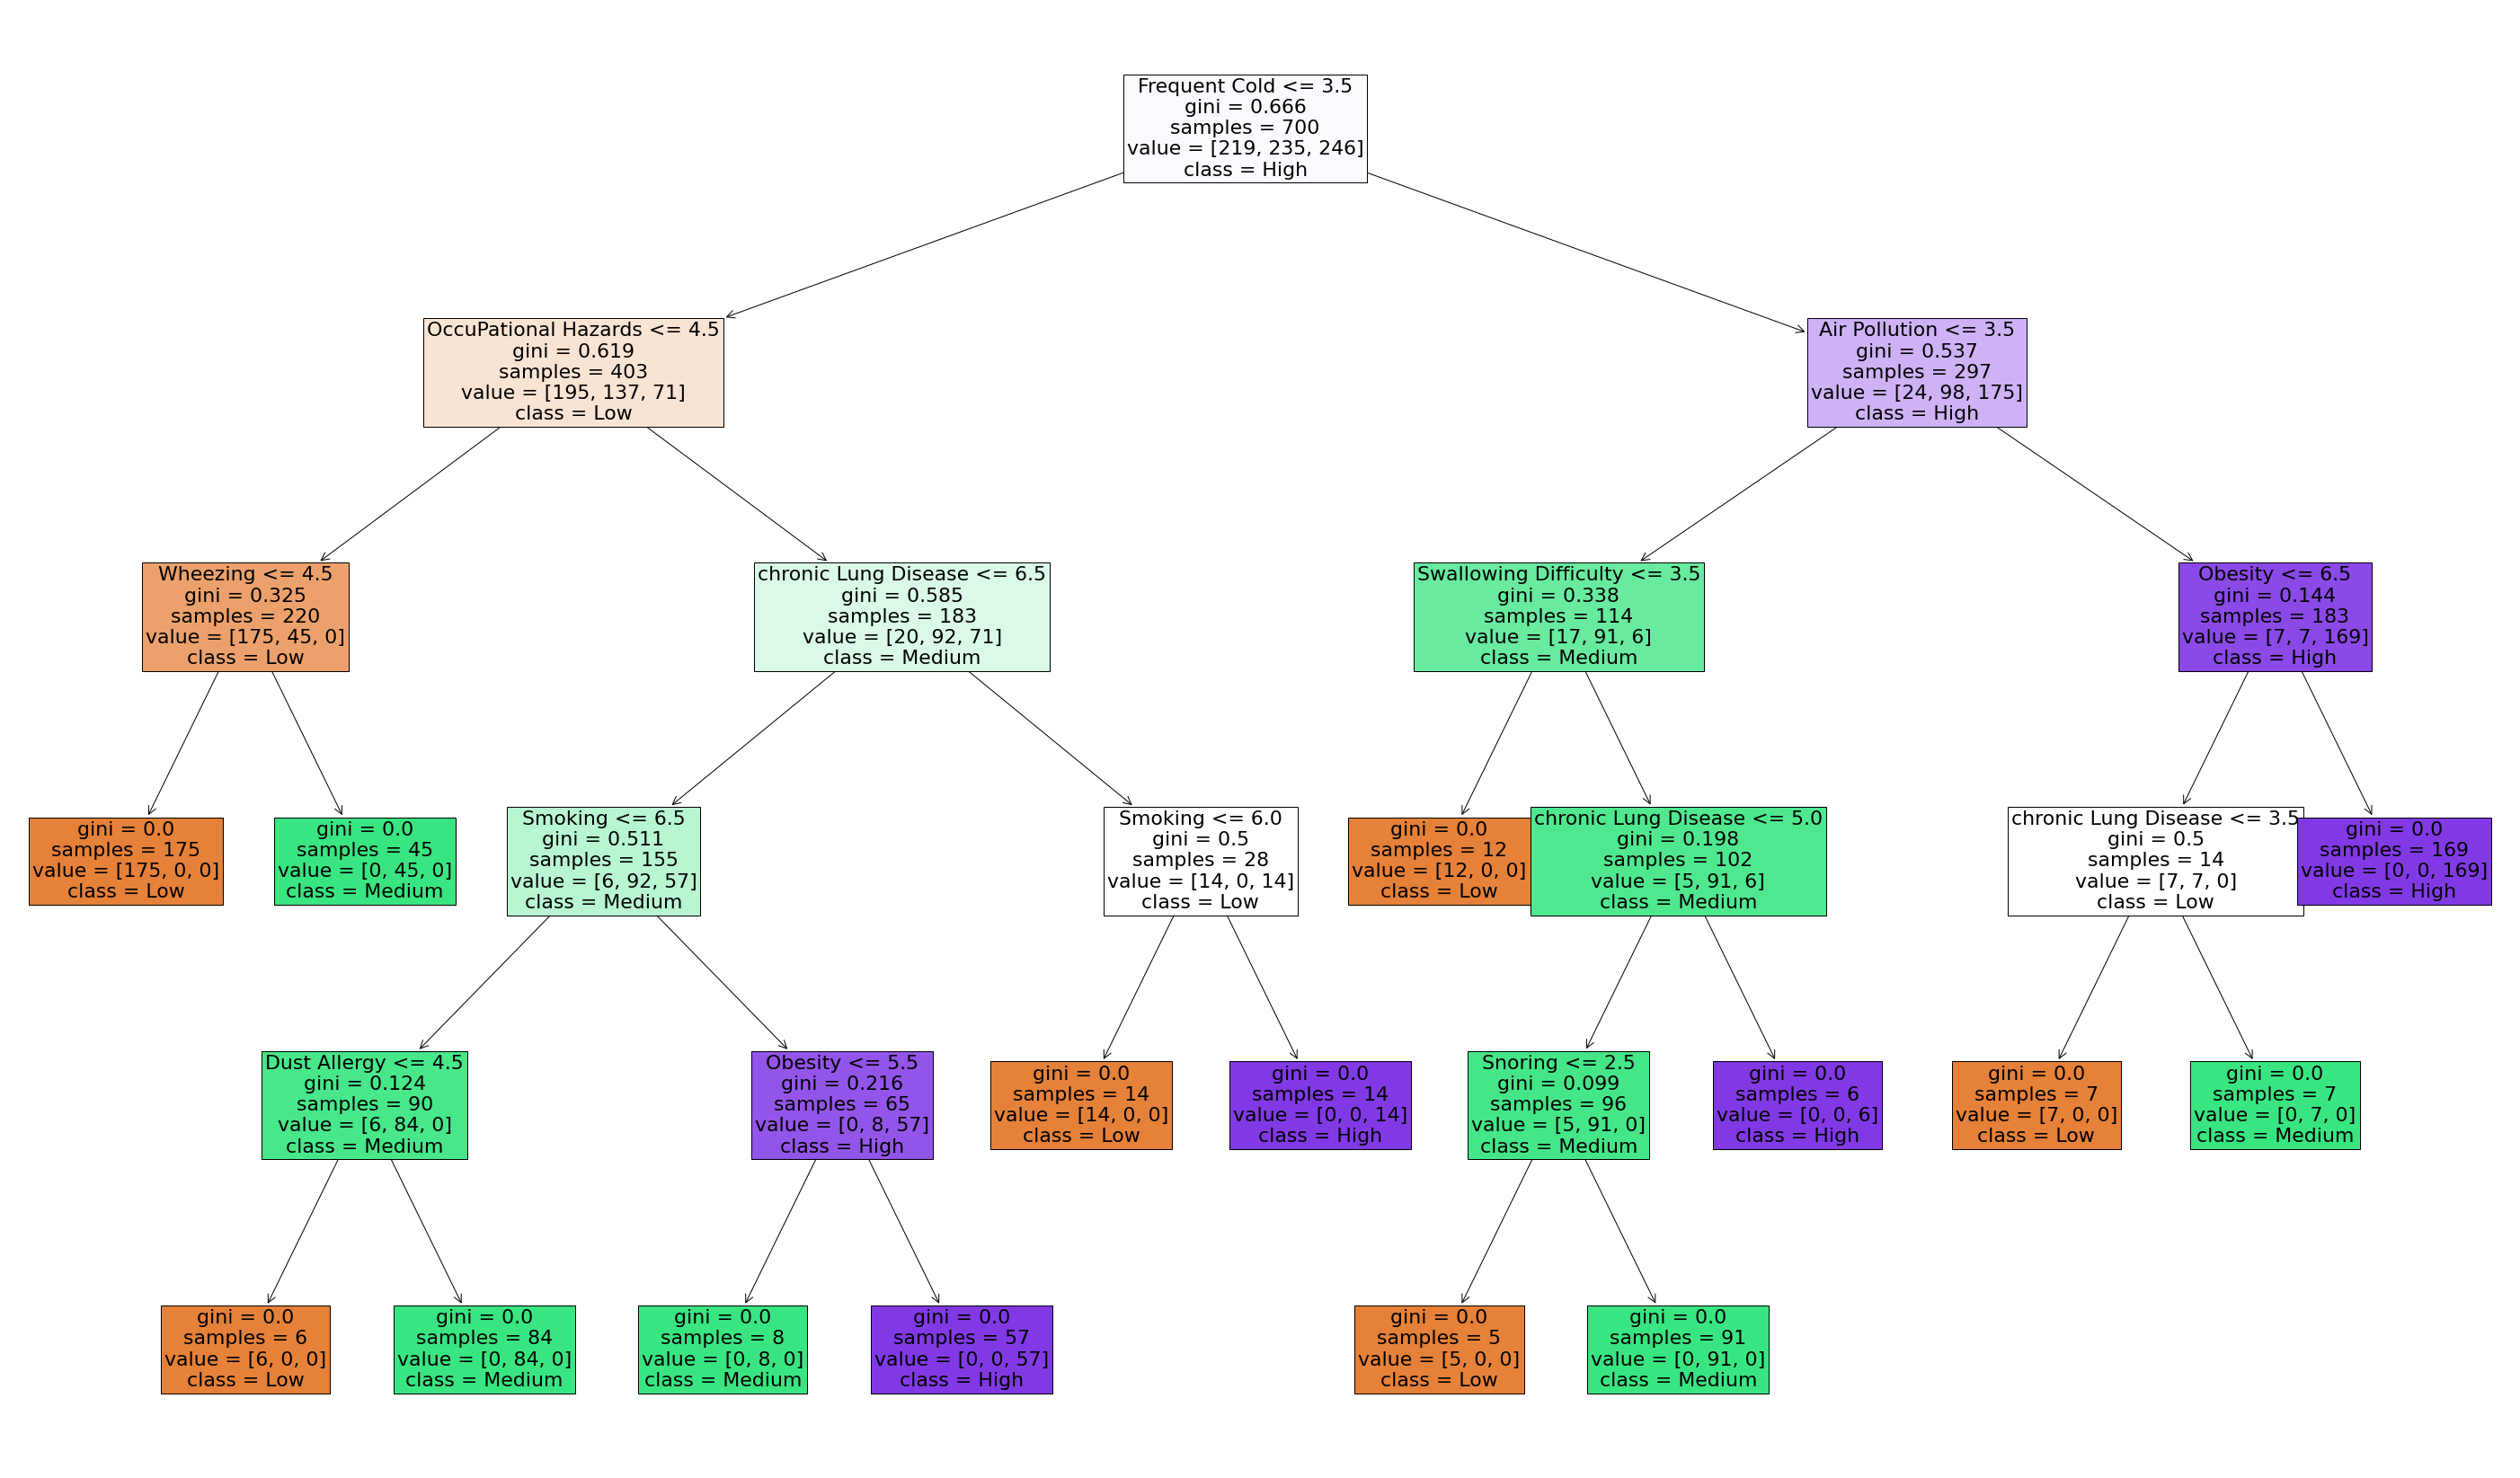

In [34]:
save_location = 'result/model_output/decision_tree_explanation.png'
myutil.plot_decision_tree(clf_tree, temp_features, save_location, fontsize=22, dimension = (50, 30))